In [46]:
import torch
from torch.utils.data import Dataset
import pandas as pd
import seaborn as sns
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import os, glob
from torchvision.io import read_image

In [2]:
x = torch.rand(5, 3)
print(x)

tensor([[0.4548, 0.6748, 0.2747],
        [0.9056, 0.6975, 0.3057],
        [0.9698, 0.3574, 0.7569],
        [0.5395, 0.0763, 0.1547],
        [0.0617, 0.1058, 0.8897]])


In [14]:
tensor = torch.ones(4, 4)
tensor[1,0] = 4
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 4., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [4., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [16]:
t1 = torch.cat([tensor,tensor,tensor], dim=0)
print(t1)

tensor([[1., 0., 1., 1.],
        [4., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [4., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [4., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [17]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

15.0 <class 'float'>


In [33]:
tensor.t_()
print(tensor)

tensor([[ 8.,  7.,  8.,  8.],
        [11.,  7.,  8.,  8.],
        [ 8.,  7.,  8.,  8.],
        [ 8.,  7.,  8.,  8.]])


In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

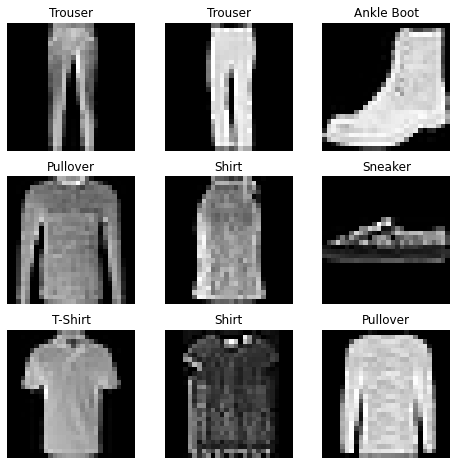

In [39]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

<AxesSubplot:ylabel='Count'>

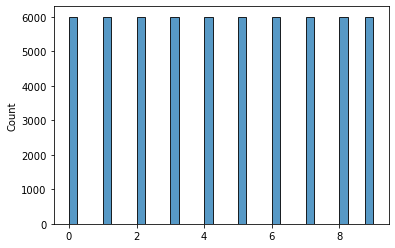

In [44]:
all_labels = training_data.targets
sns.histplot(all_labels)

In [78]:
# Define relative path to folder containing the text files

files_folder = "data/nip_annotations/"
files = []

# Create a dataframe list by using a list comprehension

files = [[pd.read_csv(file, sep='\s{2,}', engine='python', names =['category', 'x-topleft', 'y-topleft', 'x-bottomright', 'y-bottomright', 'x-center', 'y-center'] ), file] for file in glob.glob(os.path.join(files_folder ,"*.txt"))]
for file in files:
    file[0].insert(0, 'name', os.path.basename(file[1]))
files = [file[0] for file in files]


# Concatenate the list of DataFrames into one
files_df = pd.concat(files)

In [79]:
print(files_df)

              name  category  x-topleft  y-topleft  x-bottomright  \
0   0001_01_01.txt         1     255.19     803.29         365.56   
1   0001_01_01.txt         1     976.30     773.86        1071.96   
2   0001_01_01.txt         2     627.52    1402.26         704.05   
0   0001_02_01.txt         1     274.85     876.87         392.58   
1   0001_02_01.txt         1     991.55     818.01        1076.90   
..             ...       ...        ...        ...            ...   
1        both8.txt         1     138.17      46.18         152.77   
2        both8.txt         2      82.47     188.48          96.06   
0        both9.txt         1      45.81      97.13          60.87   
1        both9.txt         1     126.94      81.78         144.90   
2        both9.txt         2      96.80     176.24         113.61   

    y-bottomright  x-center  y-center  
0          901.89    312.58    868.04  
1          865.10   1029.28    831.25  
2         1453.76    668.73   1437.58  
0          